In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

%matplotlib inline

### Загрузим таблицу с данными в pd.DataFrame
#### Отсортируем по возрасту, чтобы было комфортнее работать с данными 

In [391]:
df = pd.read_csv('somascan_171_vs_1305.tsv', sep='\t', decimal=',')

df.sort_values(by=['Age'], ascending=True, inplace=True)
df

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
141,41,21,Female,Seattle,4.298,2.497,2.902,2.793,2.463,3.095,...,3.610,2.143,2.510,3.812,2.944,3.181,3.072,4.667,3.682,3.551
126,26,22,Female,Seattle,4.338,2.185,3.078,2.965,2.445,3.704,...,4.091,2.353,2.658,4.128,3.218,3.312,2.847,5.020,3.720,2.408
142,42,22,Female,Seattle,4.341,2.952,2.897,2.697,2.352,3.222,...,3.576,2.270,2.534,3.841,2.979,3.232,2.875,4.702,3.761,2.372
107,7,22,Male,Seattle,4.155,2.281,3.062,2.743,2.459,3.112,...,4.213,2.159,2.738,4.382,3.446,3.167,2.958,5.189,3.655,2.466
115,15,23,Male,Seattle,4.161,2.576,3.019,2.694,2.470,3.129,...,4.113,2.181,2.740,4.384,3.475,3.142,2.940,5.222,3.680,2.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,11030,105,Male,PRIN09,3.957,2.250,3.036,2.708,2.469,3.697,...,4.086,2.344,2.924,4.416,3.636,3.146,3.023,5.150,3.680,2.485
6,11300,106,Female,PRIN09,4.142,2.278,3.037,2.770,2.414,3.600,...,3.455,2.264,2.717,3.866,2.942,3.162,2.871,4.504,3.787,2.471
3,11140,106,Male,PRIN09,4.066,2.262,3.131,2.704,3.019,3.517,...,3.600,2.258,2.692,4.084,3.097,3.133,2.968,4.750,3.747,2.556
2,11130,106,Female,PRIN09,4.149,2.199,3.022,2.598,2.508,3.377,...,4.045,2.172,2.735,4.315,3.389,3.149,3.089,5.133,3.599,2.605


### Определим показатели, которые сильнее всего изменяются в процессе старения:
Кажется логичным предположить, что у женщин и мужчин эти показатели могут различаться, поэтому будем работать отдельно с женщинами и мужчинами.

Для этого посчитаем корреляцию между каждым показателем и возрастом, затем отсортируем по убыванию значения корреляции.
Заметим, что на данном этапе нам неважно, уменьшается или увеличивается концетрация определенного маркера в организме. Пока нас интересует лишь величина этого отклонения, поэтому будем смотреть на модуль корреляции.

In [392]:
male_df = df[df['Sex'] == 'Male']

male_corr = np.abs(male_df[male_df.columns[4:]].corrwith(male_df['Age']))
male_corr.sort_values(ascending=False, inplace=True)
male_corr.head(10)

GDF15       0.875430
PTN         0.843197
CCDC80      0.840687
EFEMP1      0.824997
CHRDL1      0.818227
ADAMTS5     0.790308
MMP12       0.777651
LTBP4       0.773304
FSTL3       0.771119
TNFRSF1A    0.763364
dtype: float64

**Вывод по мужчинам:** как видим, у мужчин с возрастом сильнее всего изменяется уровень белков, кодируемых генами **GDF15, PTN, CCDC80, EFEMP1, CHRDL1**.


In [393]:
female_df = df[df['Sex'] == 'Female']

female_corr = np.abs(female_df[female_df.columns[4:]].corrwith(female_df['Age']))
female_corr.sort_values(ascending=False, inplace=True)
female_corr.head(10)

PTN         0.799003
GDF15       0.794594
MMP12       0.766895
CCDC80      0.751856
DKK4        0.744646
CTSV        0.744105
B2M         0.742098
EFEMP1      0.732816
CST3        0.715697
ADAMTS13    0.707214
dtype: float64

**Вывод по женщинам:** как видим, у женщин с возрастом сильнее всего изменяются белки, кодируемые генами **PTN, GDF15, MMP12, CCDC80, DKK4**.

**Общий вывод:** Результаты выглядят закономерно, т.к. :
- Количество случаев заболеваний сердца, легких, печени, а также онкологических заболеваний растет с возрастом, что тесно связано с повышением уровня белка **GDF15**
- В снижении мозговой активности, а также костной массы при старении немалую роль играет белок **PTN**
- Изменение уровня остальных белков, попавших в список, по каким-то причинам отличаются у женщин и мужчин, но при этом имеется общая тенденция к более сильному изменению уровня белка у мужчин по сравнению с женщинами.

#### Хотя полученные выше результаты и можно считать достаточно достоверными, но также стоит учитывать характер выборки на которой этот результат получен. Размер выборки небольшой по количеству людей, а значит различные выбросы могут сильнее влиять на результаты, поэтому для уменьшения влияния выбросов на результат стоит смотреть на показатели по диапазонам.

1) Подготовим данные, т.е. оставим только интересующие нас параметры

In [394]:
male_target_protein_index = male_df.columns[1:2].append(male_corr.head(5).index)
male_target_protein_df = male_df[male_target_protein_index]
male_target_protein_df.reset_index(inplace=True)
male_target_protein_df = male_target_protein_df.drop(columns=['index'])
male_target_protein_df

,Age,GDF15,PTN,CCDC80,EFEMP1,CHRDL1
0,22,2.481,2.688,3.149,2.970,3.212
1,23,2.591,2.617,3.067,2.892,3.054
2,25,2.503,2.739,3.096,2.916,3.177
3,26,2.604,2.683,3.215,2.977,3.251
4,28,2.711,2.711,3.125,2.871,3.188
...,...,...,...,...,...,...
79,103,3.593,3.794,3.724,3.519,3.823
80,105,3.390,3.508,3.569,3.345,3.634
81,105,3.130,3.466,3.632,3.503,3.706
82,105,3.423,3.580,3.316,3.423,3.558


In [395]:
female_target_protein_index = female_df.columns[1:2].append(female_corr.head(5).index)
female_target_protein_df = female_df[female_target_protein_index]
female_target_protein_df.reset_index(inplace=True)
female_target_protein_df = female_target_protein_df.drop(columns=['index'])
female_target_protein_df

,Age,PTN,GDF15,MMP12,CCDC80,DKK4
0,21,2.825,2.626,2.974,3.201,3.375
1,22,2.712,2.717,2.799,3.169,3.398
2,22,2.800,2.694,2.762,3.153,3.428
3,23,2.777,2.720,2.774,3.129,3.338
4,24,2.672,2.569,2.636,3.123,3.467
...,...,...,...,...,...,...
82,104,3.203,3.383,3.463,3.347,4.056
83,105,3.278,3.056,3.444,3.539,3.918
84,106,4.005,3.372,3.613,3.814,4.064
85,106,3.560,3.163,3.609,3.464,3.835


2) Разделим выборки на группы по десятилетиям: от 20 до 30, от 30 до 40 и т.д.
Для этого добавим к каждому из фреймов по столбцу с возрастной группой

In [396]:
groups = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89', '90-99','100-109']

male_target_protein_df['AgeGroups'] = pd.cut(male_target_protein_df['Age'], bins=groups, labels=labels, ordered=False)
male_target_protein_df

,Age,GDF15,PTN,CCDC80,EFEMP1,CHRDL1,AgeGroups
0,22,2.481,2.688,3.149,2.970,3.212,20-29
1,23,2.591,2.617,3.067,2.892,3.054,20-29
2,25,2.503,2.739,3.096,2.916,3.177,20-29
3,26,2.604,2.683,3.215,2.977,3.251,20-29
4,28,2.711,2.711,3.125,2.871,3.188,20-29
...,...,...,...,...,...,...,...
79,103,3.593,3.794,3.724,3.519,3.823,100-109
80,105,3.390,3.508,3.569,3.345,3.634,100-109
81,105,3.130,3.466,3.632,3.503,3.706,100-109
82,105,3.423,3.580,3.316,3.423,3.558,100-109


In [397]:
female_target_protein_df['AgeGroups'] = pd.cut(female_target_protein_df['Age'], bins=groups, labels=labels, ordered=False)
female_target_protein_df

,Age,PTN,GDF15,MMP12,CCDC80,DKK4,AgeGroups
0,21,2.825,2.626,2.974,3.201,3.375,20-29
1,22,2.712,2.717,2.799,3.169,3.398,20-29
2,22,2.800,2.694,2.762,3.153,3.428,20-29
3,23,2.777,2.720,2.774,3.129,3.338,20-29
4,24,2.672,2.569,2.636,3.123,3.467,20-29
...,...,...,...,...,...,...,...
82,104,3.203,3.383,3.463,3.347,4.056,100-109
83,105,3.278,3.056,3.444,3.539,3.918,100-109
84,106,4.005,3.372,3.613,3.814,4.064,100-109
85,106,3.560,3.163,3.609,3.464,3.835,100-109


3) Мы хотим выполнить статистическую проверку равенства средних значений между возрастными выборками. Другими словами, нужно проверить гипотезу 1
#### **Гипотеза 1:** Наши параметры (уровни белков) зависят от возраста.

Построим графики зависимости уровня белка от возраста

In [398]:
def plot_protein_mean_level(protein_df, ptotein_mean_df):
    colors=["red", "green", "blue", "purple", "brown", "orange"]
    plt.figure(figsize=(35, 10))
    plt.suptitle("Графики зависимости уровня белков от возраста для мужчин")

    for i, protein_name in enumerate(protein_df.columns[1:-1]):
        plt.subplot(1, 5, i + 1)
        plt.plot(
            ptotein_mean_df['Age'],
            ptotein_mean_df[protein_name],
            color=colors[i],
            linewidth=3,
            label='Белок {}'.format(protein_name),
        )

        plt.legend()
        plt.grid(ls=':')

    plt.show()

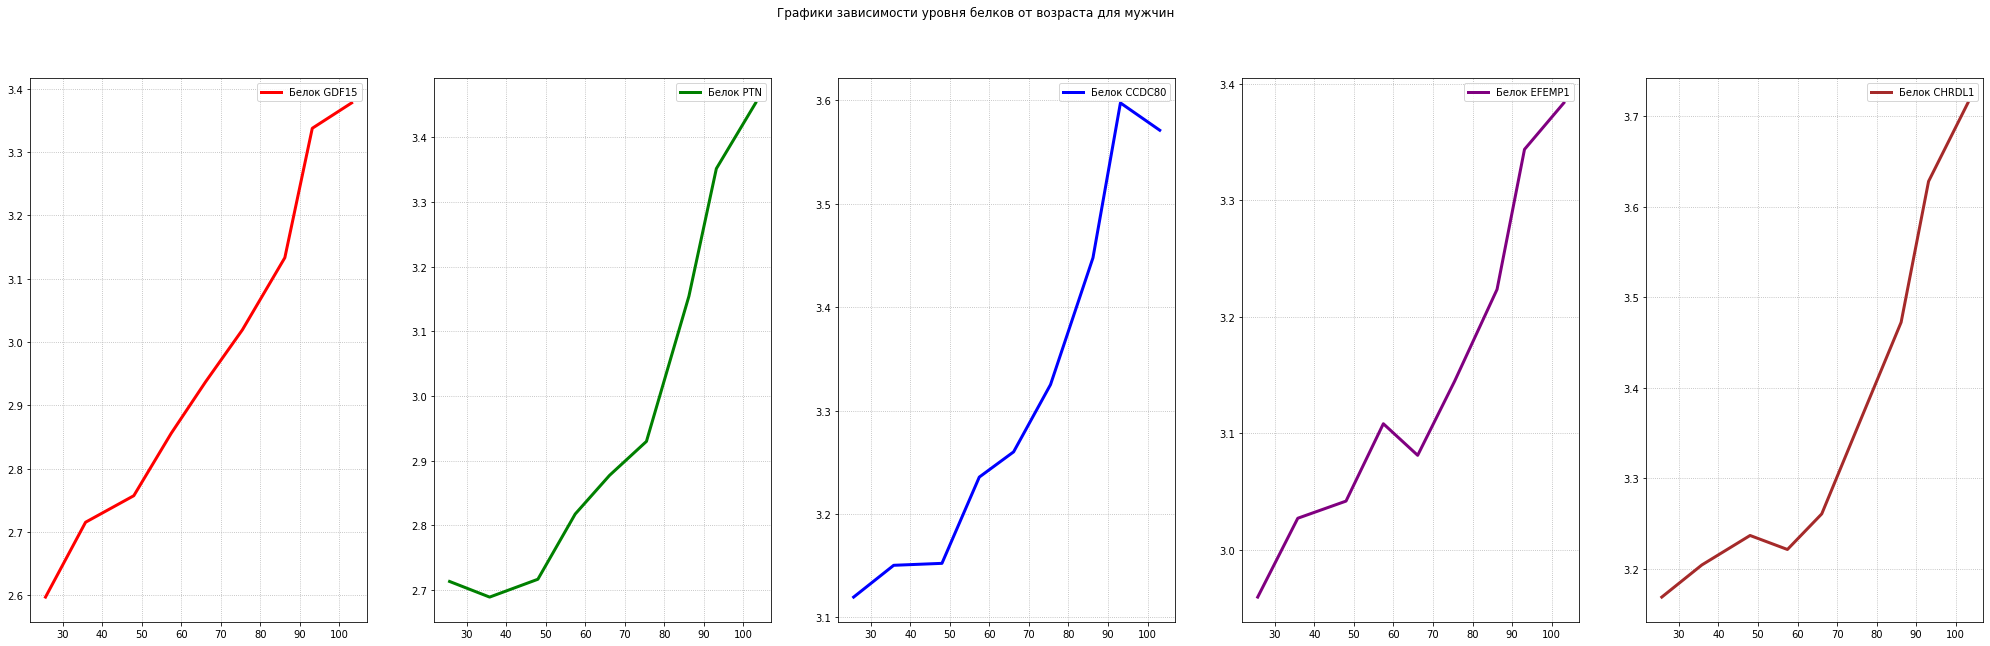

In [399]:
plot_protein_mean_level(male_target_protein_df, male_mean_df)

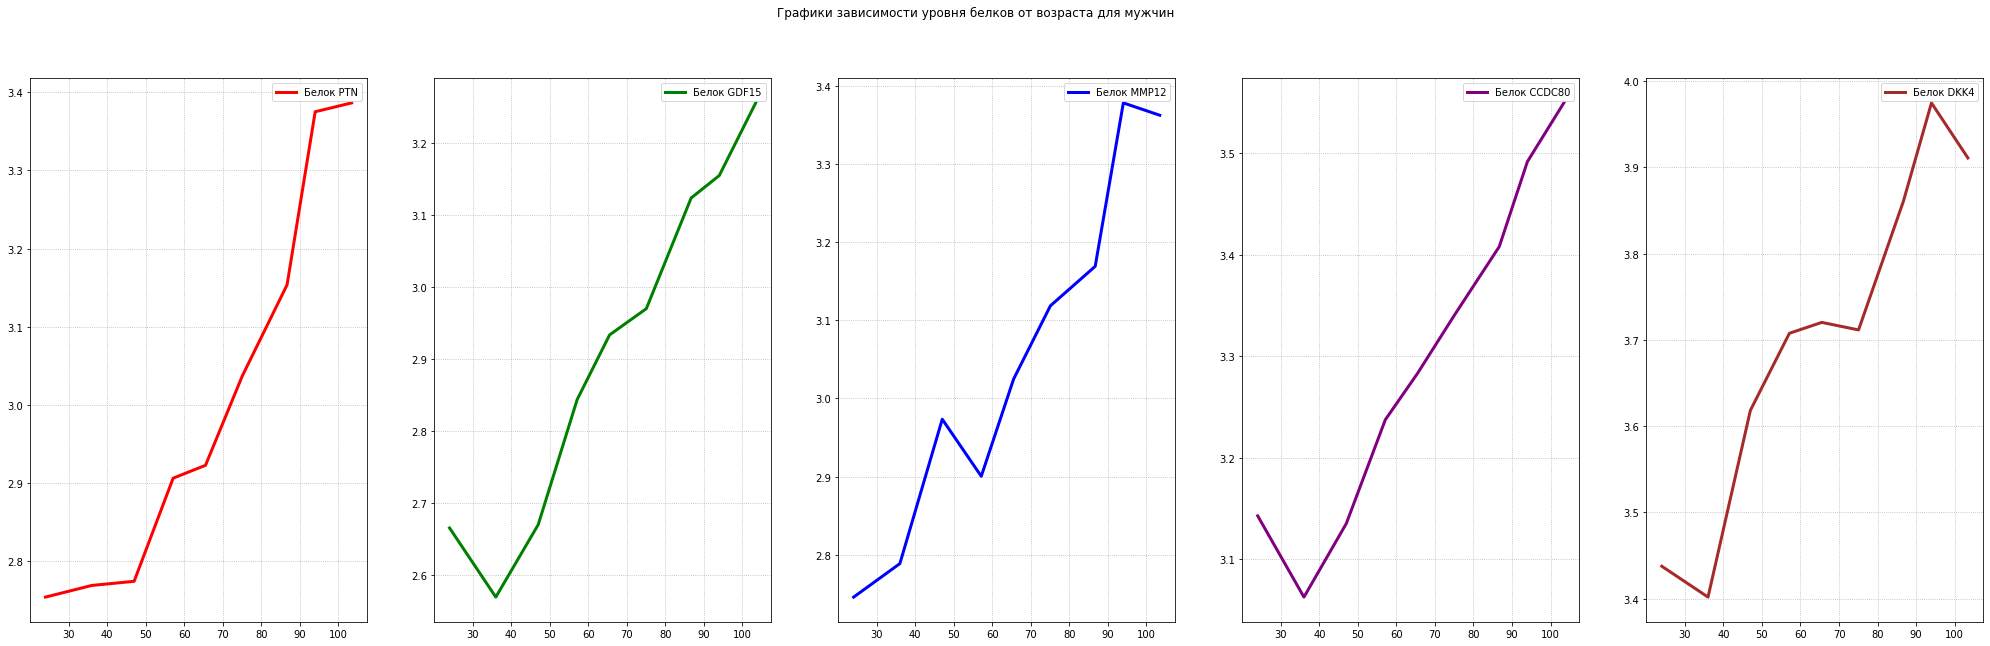

In [400]:
plot_protein_mean_level(female_target_protein_df, female_mean_df)

- Посмотрим как наши выборки распределены

In [418]:
def test_normal(protein_df, protein_mean_df):
    for protein_name in protein_df.columns[1:-1]:
        k2, p = sps.normaltest(protein_mean_df[protein_name])
        aplpha = 0.05
        if p < alpha:  # Нуль-гипотеза: Средние по уровню белка распределены нормально
            print("Нуль-гипотеза может быть отвергнута для {}".format(protein_name))
        else:
            print("Нуль-гипотезу можно принять для {}".format(protein_name))

In [419]:
male_mean_df = male_target_protein_df.groupby(by=['AgeGroups']).mean()

test_normal(male_target_protein_df, male_mean_df)

Нуль-гипотезу можно принять для GDF15
Нуль-гипотезу можно принять для PTN
Нуль-гипотезу можно принять для CCDC80
Нуль-гипотезу можно принять для EFEMP1
Нуль-гипотезу можно принять для CHRDL1


In [420]:
female_mean_df = female_target_protein_df.groupby(by=['AgeGroups']).mean()

test_normal(female_target_protein_df, female_mean_df)

Нуль-гипотезу можно принять для PTN
Нуль-гипотезу можно принять для GDF15
Нуль-гипотезу можно принять для MMP12
Нуль-гипотезу можно принять для CCDC80
Нуль-гипотезу можно принять для DKK4


#### Как видно все выборки распределены нормально, а значит для проверки Гипотезы 1 можно воспользоваться критерием Стьюдента (t-test) 

In [424]:
def print_p_values_by_decades(genes_df, labels):
    for i, protein_name in enumerate(genes_df.columns[1:-1]):
        p_values = list()

        for j in range(1, len(labels)):
            decade1 = genes_df[genes_df['AgeGroups'] == labels[j-1]]
            decade2 = genes_df[genes_df['AgeGroups'] == labels[j]]
            n = min(decade1.shape[0], decade2.shape[0])
            stat, p_value = sps.ttest_rel(decade1[protein_name].sample(n=n),
                                          decade2[protein_name].sample(n=n))
            p_values.append(p_value)

        print("Для гена {} значения p_value между соседними декадами: {}".format(protein_name, p_values))

- Посмотрим на p_value из критерия стьюдента по декадам для каждого гена. Если по декадам **p_value > 0.01**, то разница в средних по декадам есть, а значит значение параметра менялось в течение времени, что подтверждает **Гипотезу 1**

In [425]:
decades = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89', '90-99','100-109']

print("По мужчинам:")
print_p_values_by_decades(male_target_protein_df, decades)

print("По женщинам:")
print_p_values_by_decades(female_target_protein_df, decades)

По мужчинам:
Для гена GDF15 значения p_value между соседними декадами: [0.007453151397787576, 0.19271343919642392, 0.09227176693464864, 0.5999145894511133, 0.2307264084337407, 0.07752263231086962, 0.002732824774943625, 0.5254426825211964]
Для гена PTN значения p_value между соседними декадами: [0.668628991251722, 0.5781435225981233, 0.0682256905636234, 0.21966547930919636, 0.348065524571078, 0.034074156576025146, 0.07598419102370871, 0.4404664442964484]
Для гена CCDC80 значения p_value между соседними декадами: [0.6297252029655787, 0.39524251062163657, 0.046389503855656454, 0.28962890024236754, 0.023990166569289123, 0.025290463740747046, 0.03268890305666645, 0.7134733193475817]
Для гена EFEMP1 значения p_value между соседними декадами: [0.42702382298809755, 0.7202191113224057, 0.26245637407393696, 0.7846716708973831, 0.015270589875579764, 0.06496029071060798, 0.04488367848615677, 0.9976331837996257]
Для гена CHRDL1 значения p_value между соседними декадами: [0.26119496700883804, 0.3182

#### Посторим графики для большей наглядности:

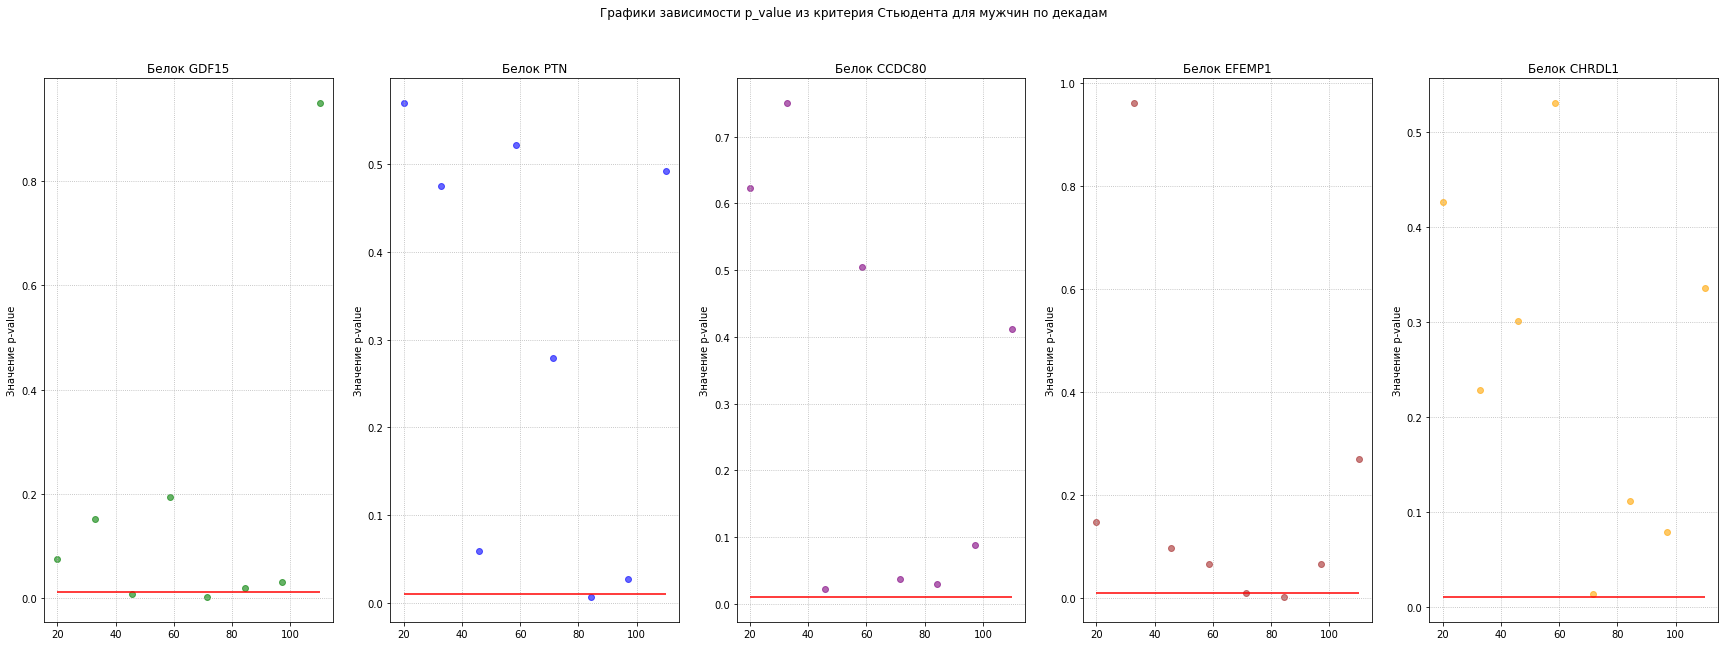

In [426]:
def plot_p_values_by_decades(genes_df, labels, title):
    colors=["green", "blue", "purple", "brown", "orange", "cyan", "gold", "magenta", "grey"]
    grid = np.linspace(20, 110, len(decades)-1)
    plt.figure(figsize=(30, 10))
    plt.suptitle(title)
    
    for i, protein_name in enumerate(genes_df.columns[1:-1]):
        p_values = list()
        stats = list()
        plt.subplot(1, 5, i + 1)
        
        for j in range(1, len(labels)):
            decade1 = genes_df[genes_df['AgeGroups'] == labels[j-1]]
            decade2 = genes_df[genes_df['AgeGroups'] == labels[j]]
            n = min(decade1.shape[0], decade2.shape[0])
            stat, p_value = sps.ttest_rel(decade1[protein_name].sample(n=n),
                                          decade2[protein_name].sample(n=n))
            p_values.append(p_value)
            stats.append(stat)
            
        plt.scatter(grid,
                    p_values, 
                    alpha=0.6,
                    color=colors[i],
                    label=f'$p$ = {p}')
        
        plt.hlines(y=0.01, xmin=20, xmax=110, colors='red', linestyles='solid')
        plt.title(f'Белок {protein_name}')
        plt.ylabel("Значение p-value")
        plt.grid(ls=':')


    plt.show()


plot_p_values_by_decades(male_target_protein_df, decades, "Графики зависимости p_value из критерия Стьюдента для мужчин по декадам")

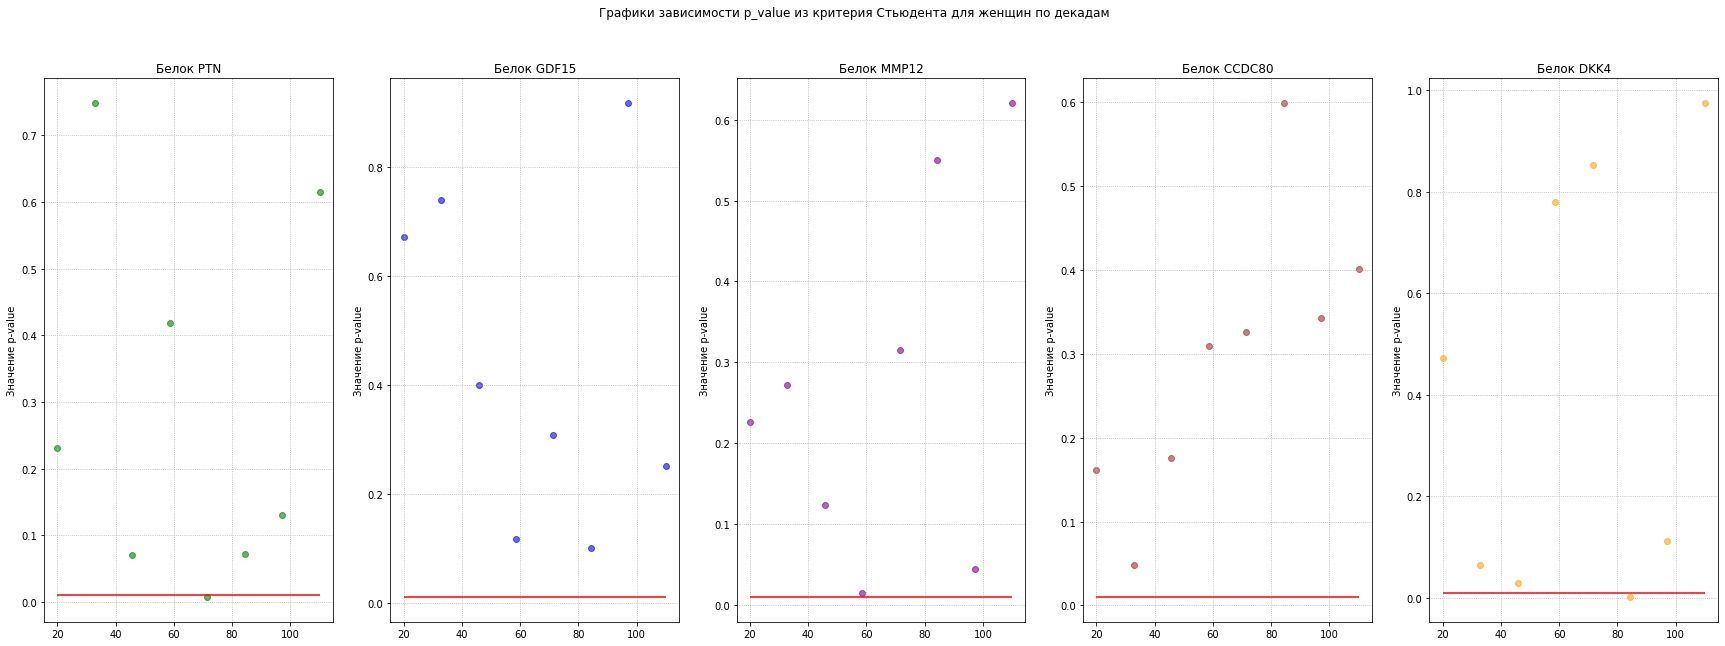

In [427]:
plot_p_values_by_decades(female_target_protein_df, decades, "Графики зависимости p_value из критерия Стьюдента для женщин по декадам")

In [428]:
def plot_gene_levels_by_decades(genes_df, labels):
    plt.figure(figsize=(12, 60))
    
    for i, protein_name in enumerate(genes_df.columns[1:-1]):
        p_values = list()
        stats = list()
        plt.subplot(5, 1, i + 1)
                    
        sns.boxplot(
            data=genes_df,
            x='AgeGroups', 
            y=protein_name, 
            palette='bright'
        )
        
        plt.title(f'Белок {protein_name}')
        plt.grid(ls=':')
        
    plt.show()

### Построим графики зависимости уровня белков по возрастным группа для женщин:

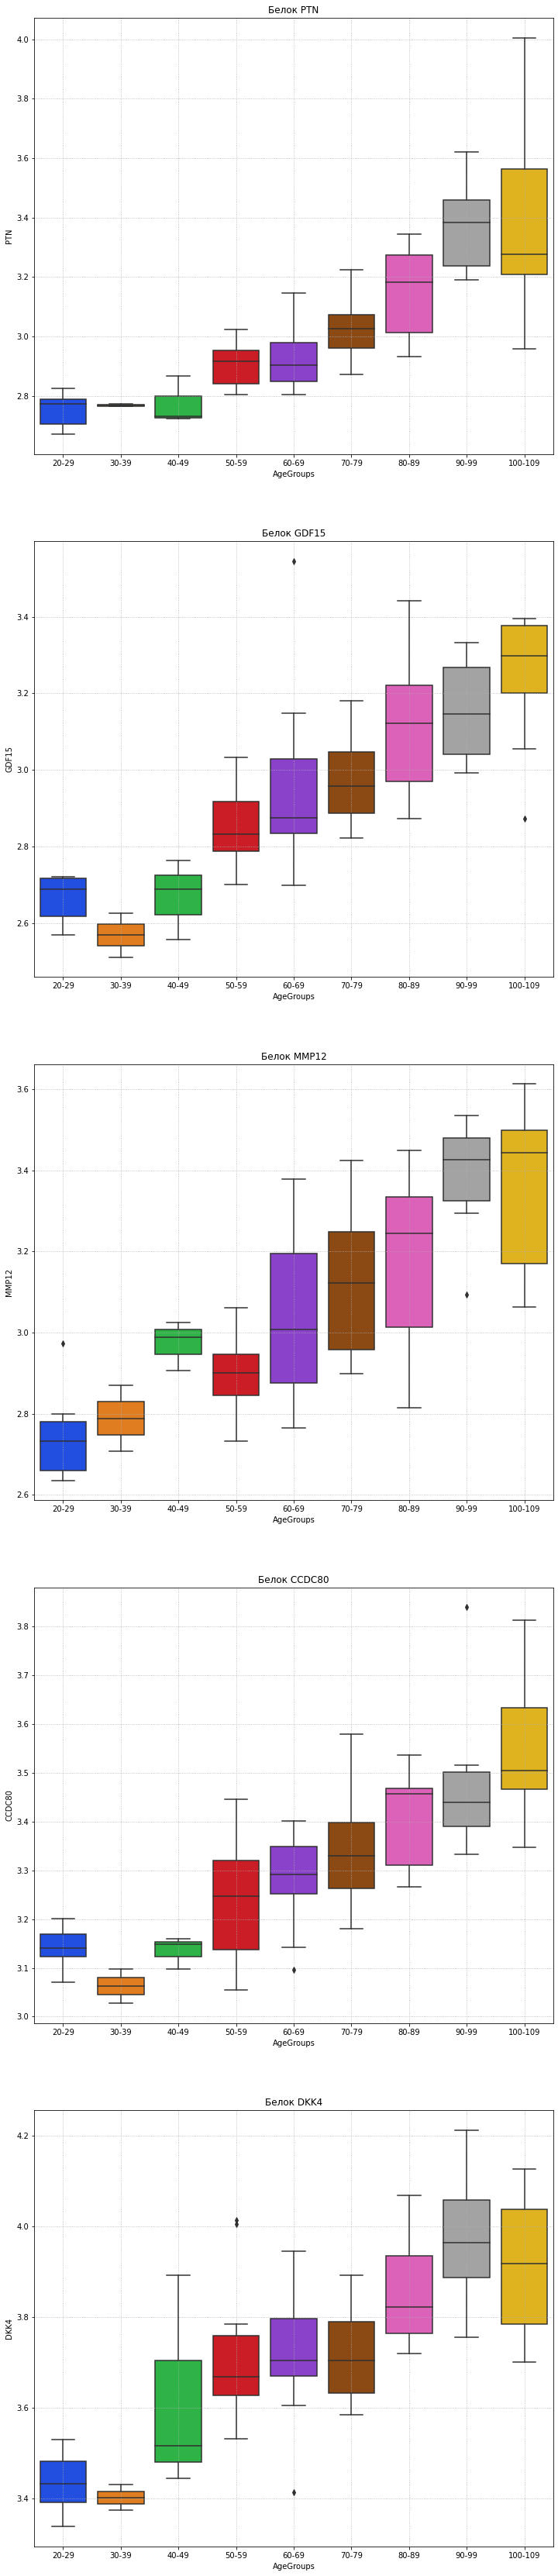

In [429]:
plot_gene_levels_by_decades(female_target_protein_df, decades)

### Построим графики зависимости уровня белков по возрастным группа для мужчин:

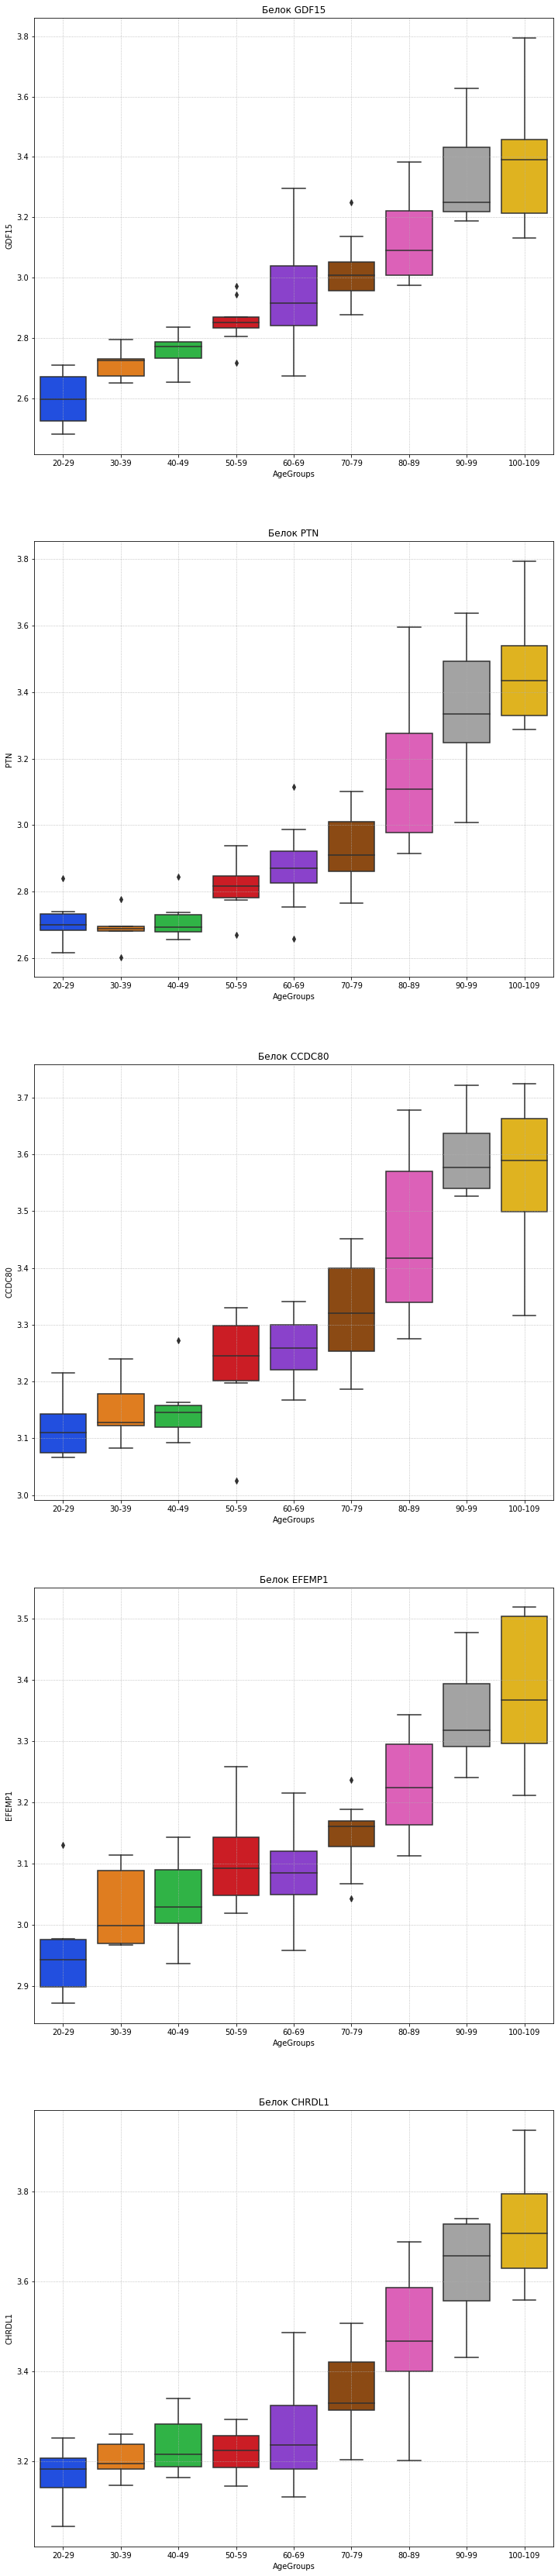

In [430]:
plot_gene_levels_by_decades(male_target_protein_df, decades)

### Вывод: Гипотеза 1 не отверглась, выбранные параметры, действительно изменяются с возрастом. Это можно пронаблюдать на различных графиках, а также посмотреть на значения p-value из критерия Стьюдента для выборок по возрастным группам.

### PS. Задание классное, жаль, что из-за учебы получилось выделить на не не так много времени. Мне было бы интересно продолжить работать в этом направлении!